<a href="https://colab.research.google.com/github/Fakhre-Alam-Hub/Data-Science-Basic/blob/master/Notes/1_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Basics of Preprocessing in Machine Learning </center>

# Process of Model Building

1. **Data Collection**

2. **Data Pre-processing**
>* Outlier Treatment
>* Missing Value Imputaion
>* Variable Transformation

3. **Model Training**
>* Train-Test Split
>* Use template to train
>* Do iterations
>* Compare performance of different methods using test set

4. **Select The Best Model**
>* For prediction purpose use the best model with accuracy
>* For interpretation purposes look at the coefficient values of parametric models

# Univariate(One-Variable) Analysis

## Outliers

Outliers are the observation that appears far away and diverges from overall pattern in a sample.

**When there is an outlier then there is large difference in mean and median and standard deviation of the sample.**

**Impact:** It increases the error variance and mislead the statistics test.

**Solution:** Detect outliers using visualization methods(scatter plot,boxplot,histogram,etc.) and then impute outliers.

### Outlier Value Treatment

1. **Capping And Flooring (mostly preffered)**
    * Impute all the values greater than specific value.
    * Ex. Select 99 percentile as upper limit and 1 percentile as lower limit, all values above than upper limit value will be assign to a particular value of  3*P99 (P - percentile) and all the values below lower limit value will be assign to a particular value of 0.3*P1 (P - percentile).
    * 3 and 0.3 is a multiplier, and is selected as per the business requirements.


2. Exponential Smoothing
    * For upper value, Extrapolate the curve of P95 and P99 and cap all the values falling outside of this curve
    * For lower value, Extrapolate the curve of P5 and P1 and cap all the values falling outside of this curve


3. Sigma Approach
    * Identifie outlier by capturing all the values falling outside $\mu \mp x\sigma$ (x is a multiplier)
    * For example all values farther from mean by more than 3 standard deviation are replaced with 
$\mu \mp 3\sigma$

## Missing Values

Observation that has not recorded or data corruption.

**Impact:** Many machine learning algorithm do not support data with missing values.

**Solutions:** 
* Remove rows with missing data
* Impute missing values with mean/median/mode values of sample

### Missing Value Treatment

1. Impute with Zero
    * Impute missing value with zero where make sense
    
    
2. Impute with mean/median/mode
    * For numerical variables, impute with mean/median
    * For categorical variable, impute with mode
    
    
3. Segment based imputation
    * Identify the segments, ex: region,city
    * impute with mean/median/mode of particular segment.
    * For example, imputing missing value of rainfall variable with average rainfall of neighbouring city or state instead of population mean.

## Seasonality

Seasonality is the presence of variation that occur at specific regular intervals less than a year, such as weekly, monthly or quarterly.

**Reasons**
* Weather
* Vacations
* Holidays

**Examples:** Ice cream sales, Christmas sales

**Solution:**
* Remove seasonality from data
* Calculate multiplication factor for each month as

  $m_{month} = \mu_{year} \div \mu_{month}$
    
    
* Multiply each observation with it's multiplication factor 


# Bivariate(Two - Variable) Analysis

**Scatter Plot**
* Scatter indicates the type(linear or non-linear) and strength of the relationship between two variables
* If the relation is non-linear, we will transform the variable

**Correlation**
* Correlation is a statistical measure that indicates the extents to which two or more variables fluctuate together.
* Correlation quantifies the strength of a linear relationship between two numerical variables
* Correlation is used to drop non usable variables.
* Range between -1 to +1
    * **-1 : negative correlation**
        :- A -ve correlation indicates the extents to which one variables increases as the other decreases
    * **+1 : positive correlation**
        :- A +ve correlation indicates the extents to which those variables increase or decrease in parallel
    * **0 : no correlation**
        :- one variable increase or decrease doesn't affect other variable
        
        
* **If there is zero correlation between dependent and independent variable then discard that independent varaible**
* **If there is high correlation(say >= 0.8) between two independent variable then discard one with low correlation with dependent variable (It leads to Multi-Colinearity)**

## Variable Transformation

**methods**
* Use mean/median of variables conveying similar type of information
* Create ratio variable which are more relevant to business
* Transform variable by taking log, eponential, roots, etc.

**Non Usable Variables**

* Varaiables with single unique variable
* variables with low fill rate (ex: out of 100 observation only 20 observation data present)
* Variables with regulatory issue (ex: descriminatory variables such as religion, sex, color, etc.)
* Variables with no business sense 

These variables must be removed from dataset

## Dummy Variable for Categorical variable

**For Nominal categories:** Use on hot encoding

**For Ordinal categories:** Use on order encoding

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data Science Notes with Example/Data Files/1. ST Academy - Crash course and Regression files/House_Price.csv")
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


# Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

In [ ]:
df.shape

(506, 19)

In [ ]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507
75%,25.000000,3.677082,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711


## Numerical columns visualization

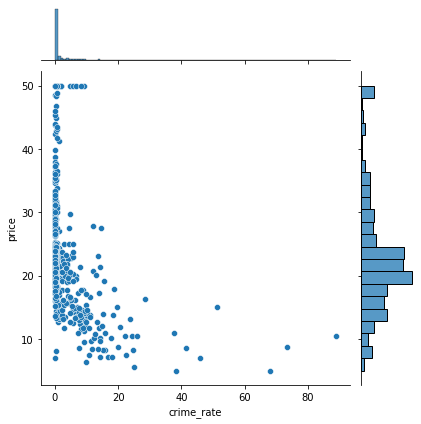

In [ ]:
sns.jointplot(x="crime_rate",y="price",data=df,kind='scatter',)
plt.show()

* Skewness or outlier (not sure) in crime_rate as there is large difference between max and 75 percentile as compared to other percentile

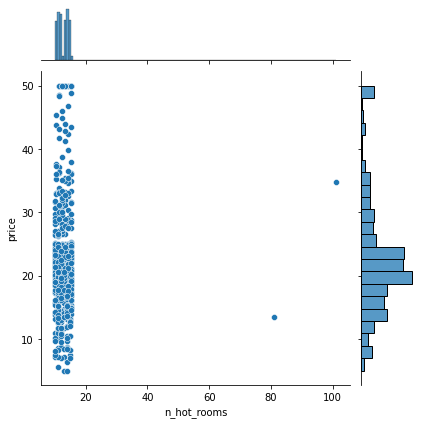

In [ ]:
# scatter plot of price vs n_hot_rooms (other option: boxplot)
sns.jointplot(x="n_hot_rooms",y="price",data=df,kind='scatter',)
plt.show()

* most of the data lies between 0 to 20 on x-axis, but there is two outlier on our dataset

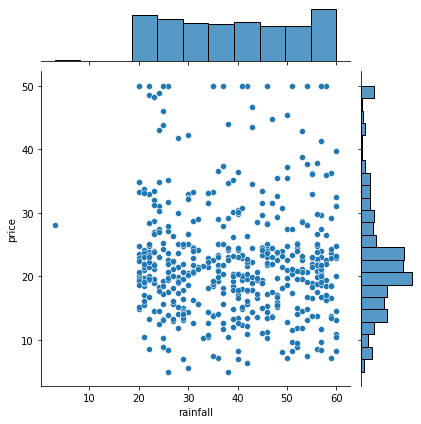

In [ ]:
# scatter plot of price vs rainfall
sns.jointplot(x="rainfall",y="price",data=df,kind='scatter',)
plt.show()

* most of the data lies between 20 to 60 on x-axis, but there is one outlier on our dataset

## Categorical columns analysis

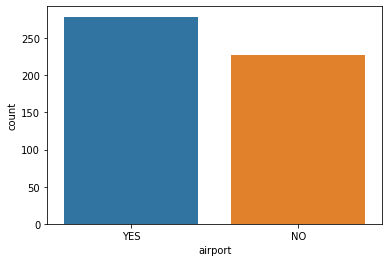

In [ ]:
sns.countplot(x= "airport",data=df)
plt.show()

* Nothing unusual

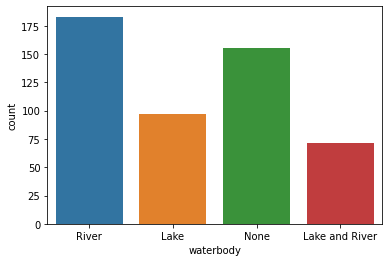

In [ ]:
sns.countplot(x= "waterbody",data=df)
plt.show()

* Nothing unusual

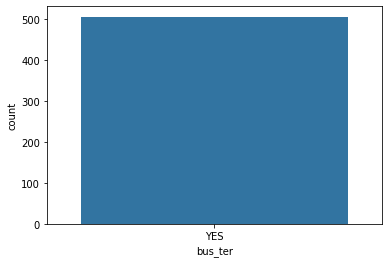

In [ ]:
sns.countplot(x= "bus_ter",data=df)
plt.show()

* Only has single value, YES. Doesn't seems to be important predictor for this dataset

## Observations from above analysis

* "n_hos_beds" --> has 8 null value
* "crime_rate" --> Skewness or outlier
* "n_hot_rooms" and "rainfall" --> present outlier
*  "bus_ter" --> Has single value Yes

### Outlier treatment

**Outlier removal in n_hot_rooms**

In [ ]:
print('99 percentile of n_hot_rooms is: ',np.percentile(df.n_hot_rooms,[99])[0])

99 percentile of n_hot_rooms is:  15.399519999999999


In [ ]:
# extract the dataframe where n_hot_rooms value is greater than 99 percentile, 
# from above plot this is confirmed that oulier present on upper side
uv = np.percentile(df.n_hot_rooms,[99])[0]
df[df.n_hot_rooms>uv]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
2,34.7,0.02729,37.07,0.4690,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.12,None,38,YES,0.045764
166,50.0,2.01019,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,YES,8.300,15.40,River,37,YES,0.052105
204,50.0,0.02009,32.68,0.4161,8.034,31.9,5.41,4.80,5.28,4.99,25.3,2.88,YES,8.900,15.40,River,51,YES,0.044178
267,50.0,0.57834,33.97,0.5750,8.297,67.0,2.60,2.13,2.43,2.52,27.0,7.44,YES,8.000,15.40,None,42,YES,0.063235
369,50.0,5.66998,48.10,0.6310,6.683,96.8,1.55,1.28,1.65,0.94,19.8,3.73,YES,6.700,15.40,River,58,YES,0.067477
423,13.4,7.05042,48.10,0.6140,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,81.12,Lake,29,YES,0.063344


In [ ]:
# Cap the genuine outliers above 99 percentile
df.n_hot_rooms[df.n_hot_rooms>3*uv] = 3*uv

In [ ]:
df[df.n_hot_rooms>uv]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
2,34.7,0.02729,37.07,0.4690,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,46.19856,None,38,YES,0.045764
166,50.0,2.01019,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,YES,8.300,15.40000,River,37,YES,0.052105
204,50.0,0.02009,32.68,0.4161,8.034,31.9,5.41,4.80,5.28,4.99,25.3,2.88,YES,8.900,15.40000,River,51,YES,0.044178
267,50.0,0.57834,33.97,0.5750,8.297,67.0,2.60,2.13,2.43,2.52,27.0,7.44,YES,8.000,15.40000,None,42,YES,0.063235
369,50.0,5.66998,48.10,0.6310,6.683,96.8,1.55,1.28,1.65,0.94,19.8,3.73,YES,6.700,15.40000,River,58,YES,0.067477
423,13.4,7.05042,48.10,0.6140,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,46.19856,Lake,29,YES,0.063344


* Outliers is replaced with 46.19856 which is 3*uv in n_hot_rooms column

**Outlier removal in rainfall**

In [ ]:
print('1 percentile of rainfall is: ',np.percentile(df.rainfall,[1])[0])

1 percentile of rainfall is:  20.0


In [ ]:
# extract the dataframe where rainfall value is less than 1 percentile, 
# from above plot this is confirmed that oulier present on lower side
lv = np.percentile(df.rainfall,[1])[0]
df[df.rainfall<lv]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
213,28.1,0.14052,40.59,0.489,6.375,32.3,4.11,3.92,4.18,3.57,21.4,9.38,YES,7.562,10.2248,None,3,YES,0.044019


In [ ]:
# Cap the genuine outliers below 1 percentile
df.rainfall[(df.rainfall < 0.3*lv)] = 0.3*lv

df[df.rainfall<lv]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
213,28.1,0.14052,40.59,0.489,6.375,32.3,4.11,3.92,4.18,3.57,21.4,9.38,YES,7.562,10.2248,None,6,YES,0.044019


* Outliers is replaced with 6 which is 0.3*lv in rainfall column

### Transfroming variable

**Transforming crime_rate column**

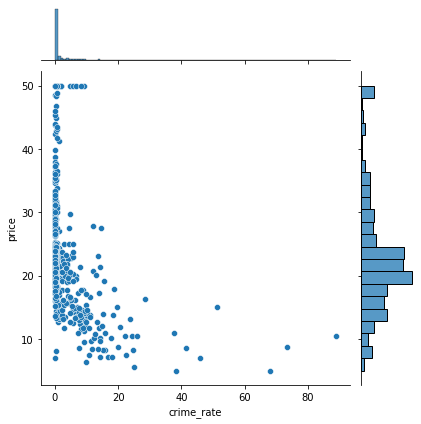

In [ ]:
# Since we are not sure of outlier in crime_rate, we plot jointplot
sns.jointplot(x="crime_rate",y="price",data=df,kind='scatter',)
plt.show()

* From plot, large concentration of values on lower spectra of crime_rate
* There is some what polynomial relation with price on y-axis
* For low crime_rate price is high, high crime_rate price is low
* To make it linear we transform the crime_rate into log,exponential,sqrt,etc. to make it more linear

It seems to be of logarithmic pattern

Let's transform "crime_rate" variable in log(x)

In [ ]:
# Transforming to log(x)
df.crime_rate = np.log(1+df.crime_rate)

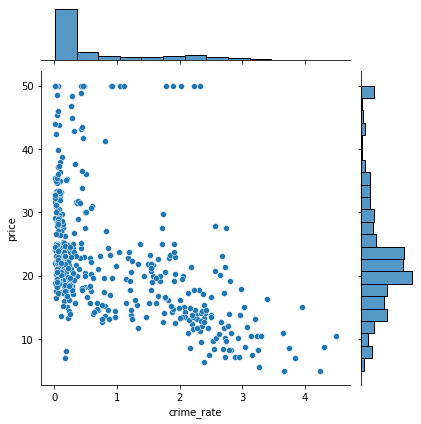

In [ ]:
sns.jointplot(x="crime_rate",y="price",data=df,kind='scatter',)
plt.show()

Now it's seems somewhat linear

And there is no outlier.

**Transforming dist1, dist2, dist3, dist4 column**

Now transforming  dist1, dist2, dist3, dist4 variable into a single variable which is the mean of these variable, because these four variable conveys the similar type of information

In [ ]:
df['avg_dist'] = (df.dist1+df.dist2+df.dist3+df.dist4)/4

In [ ]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,avg_dist
0,24.0,0.006300,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.19200,River,23,YES,0.049347,4.0875
1,21.6,0.026944,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.17280,Lake,42,YES,0.046146,4.9675
2,34.7,0.026924,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,46.19856,None,38,YES,0.045764,4.9675
3,33.4,0.031857,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.26720,Lake,45,YES,0.047151,6.0650
4,36.2,0.066770,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.28960,Lake,55,YES,0.039474,6.0625


Remove dist1, dist2, dist3, dist4 from dataframe 

In [ ]:
df = df.drop(columns=["dist1", "dist2", "dist3", "dist4"], axis=1)
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,avg_dist
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,YES,5.480,11.19200,River,23,YES,0.049347,4.0875
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,NO,7.332,12.17280,Lake,42,YES,0.046146,4.9675
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,NO,7.394,46.19856,None,38,YES,0.045764,4.9675
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,YES,9.268,11.26720,Lake,45,YES,0.047151,6.0650
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,NO,8.824,11.28960,Lake,55,YES,0.039474,6.0625


Now remove useless "bus_ter" variable beacause it has no importance.

In [ ]:
del df['bus_ter']

df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,parks,avg_dist
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,YES,5.480,11.19200,River,23,0.049347,4.0875
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,NO,7.332,12.17280,Lake,42,0.046146,4.9675
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,NO,7.394,46.19856,None,38,0.045764,4.9675
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,YES,9.268,11.26720,Lake,45,0.047151,6.0650
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,NO,8.824,11.28960,Lake,55,0.039474,6.0625


In [ ]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,0.813418,41.136779,0.554695,6.284634,68.574901,21.544466,12.653063,7.899767,12.864050,39.187747,0.054454,3.795104
std,9.182176,1.022731,6.860353,0.115878,0.702617,28.148861,2.164946,7.141062,1.476683,2.688778,12.497221,0.010632,2.105859
min,5.000000,0.006300,30.460000,0.385000,3.561000,2.900000,18.000000,1.730000,5.268000,10.057600,6.000000,0.033292,1.127500
25%,17.025000,0.078853,35.190000,0.449000,5.885500,45.025000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464,2.100625
50%,21.200000,0.228336,39.690000,0.538000,6.208500,77.500000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507,3.207500
75%,25.000000,1.542674,48.100000,0.624000,6.623500,94.075000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397,5.187500
max,50.000000,4.499545,57.740000,0.871000,8.780000,100.000000,27.400000,37.970000,10.876000,46.198560,60.000000,0.086711,12.127500


### Missing Value Treatment

From the above observation we observe that "n_hos_beds" column has missing value.

In [ ]:
df.n_hos_beds = df.n_hos_beds.fillna(df.n_hos_beds.mean())

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   teachers     506 non-null    float64
 7   poor_prop    506 non-null    float64
 8   airport      506 non-null    object 
 9   n_hos_beds   506 non-null    float64
 10  n_hot_rooms  506 non-null    float64
 11  waterbody    506 non-null    object 
 12  rainfall     506 non-null    int64  
 13  parks        506 non-null    float64
 14  avg_dist     506 non-null    float64
dtypes: float64(12), int64(1), object(2)
memory usage: 59.4+ KB


* All the missing value has been imputed with mean of "n_hos_beds"

### Categorical Variable treatment



In this dataset we have two categorical variable 'airport' and 'waterbody'

In [ ]:
df = pd.get_dummies(df)

df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_NO,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_None,waterbody_River
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,4.0875,0,1,0,0,0,1
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,4.9675,1,0,1,0,0,0
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,4.9675,1,0,0,0,1,0
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,6.0650,0,1,1,0,0,0
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,6.0625,1,0,1,0,0,0


Remove redundent variable

In [ ]:
del df['airport_NO']
del df['waterbody_None']

df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,4.0875,1,0,0,1
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,4.9675,0,1,0,0
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,4.9675,0,0,0,0
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,6.0650,1,1,0,0
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,6.0625,0,1,0,0


### Correlation matrix

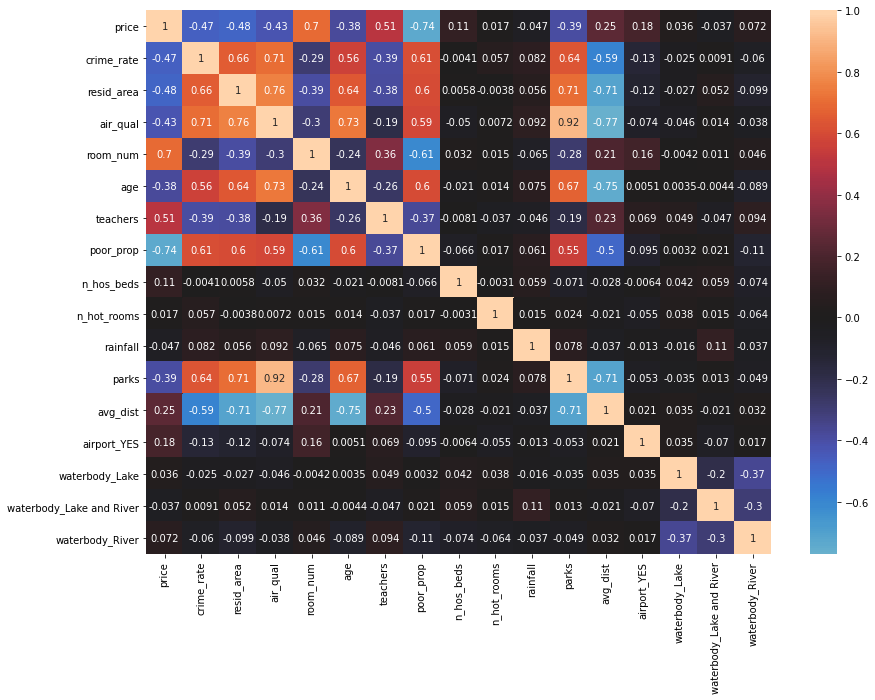

In [ ]:
corr = df.corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr,annot=True,center=0)
plt.show()

From above plot we notice park and air_qual are highly correlated, therefor we have to discard one of them 
* compare with the dependent variable, which has lowest correlation remove that variable
* go with that variable which is easily availabel and can be easily measure

I am going to discard parks

In [ ]:
del df['parks']

df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,4.0875,1,0,0,1
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,4.9675,0,1,0,0
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,4.9675,0,0,0,0
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,6.0650,1,1,0,0
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,6.0625,0,1,0,0


In [ ]:
# save cleaned dataframe
df.to_csv('/content/drive/MyDrive/Data Science Notes with Example/Data Files/1. ST Academy - Crash course and Regression files/House_Price_cleaned.csv', index=False)